In [117]:
%run IDM_helper_functions.ipynb

## Train IDM

In [23]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

## Simulate from LCA and fit with IDM

In [27]:
n_trials = 1000
sim_num = 20

prior = utils.BoxUniform(low=[0, 0.5, -4, 0.2], high=[2, 2, 4, 0.5])
LCA_parameters = prior.sample((20,))

par_fitted = np.zeros((sim_num,4))

In [28]:
for i in range(sim_num):
    print(i)
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=LCA_parameters[i,0], 
                                    t = 0, 
                                    x = LCA_parameters[i,2]),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=LCA_parameters[i,1]),
                  overlay=OverlayNonDecision(nondectime=LCA_parameters[i,3]),
                  dx=.008, dt=.005, T_dur=2) # also change the lower part
    #display_model(model)
    sol = model.solve()

    samp = sol.resample(n_trials)

    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=2),
                                        t = 0,
                                        x=Fittable(minval=-4, maxval=4)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.5, maxval=2)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.2, maxval=0.5)),
                      dx=.008, dt=.005, T_dur=2)
                      #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['drift']['x'])
    par_fitted[i,3] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(LCA_parameters[i,:])
    print(par_fitted[i,:])



0


Info: Params [0.8195032  1.76319085 1.7427787  0.42392055] gave 1175.884566472122


tensor([ 0.5842,  1.2467, -0.4371,  0.4396])
[0.8195032  1.7427787  1.76319085 0.42392055]
1


Info: Params [0.7021954  2.07144006 1.03303159 0.49709344] gave 1442.1497563558287


tensor([0.6450, 0.9393, 0.9826, 0.4953])
[0.7021954  1.03303159 2.07144006 0.49709344]
2


Info: Params [0.07423814 3.95977045 1.57446266 0.46538592] gave 1302.5542546121624


tensor([1.0474e-03, 1.4119e+00, 3.6932e+00, 4.8323e-01])
[0.07423814 1.57446266 3.95977045 0.46538592]
3


Info: Params [1.78068527 0.85878488 1.99632014 0.49821433] gave 726.2179257747806


tensor([1.2884, 1.8778, 0.7073, 0.4833])
[1.78068527 1.99632014 0.85878488 0.49821433]
4


Info: Params [0.59297477 2.85481067 0.99871184 0.29155905] gave 1292.1186896908075


tensor([0.6254, 0.9520, 2.3701, 0.2922])
[0.59297477 0.99871184 2.85481067 0.29155905]
5


Info: Params [0.68008567 1.91144906 0.52588836 0.31156096] gave 153.62006736327956


tensor([0.6244, 0.5363, 1.9129, 0.3057])
[0.68008567 0.52588836 1.91144906 0.31156096]
6


Info: Params [1.20046752 0.62349973 1.24509424 0.2450386 ] gave 1273.7986222303434


tensor([ 1.0183,  0.8693, -2.6641,  0.2882])
[1.20046752 1.24509424 0.62349973 0.2450386 ]
7


Info: Params [ 1.82338097 -1.06466853  0.55042397  0.42743426] gave -258.5987894801973


tensor([ 1.8768,  0.5256, -1.6953,  0.4271])
[ 1.82338097  0.55042397 -1.06466853  0.42743426]
8


Info: Params [ 1.27353082 -1.76574743  0.57851648  0.41820979] gave 625.3961205249366


tensor([ 1.2521,  0.6302, -0.7876,  0.4137])
[ 1.27353082  0.57851648 -1.76574743  0.41820979]
9


Info: Params [0.31791206 1.78308731 1.73345188 0.20168158] gave 811.9902363781447


tensor([ 0.2069,  1.0153, -3.0374,  0.2574])
[0.31791206 1.73345188 1.78308731 0.20168158]
10


Info: Params [0.33150384 2.29726366 1.85044108 0.22419048] gave 1908.0801288878934


tensor([0.2588, 1.3155, 1.0100, 0.2857])
[0.33150384 1.85044108 2.29726366 0.22419048]
11


Info: Params [ 1.28061457 -1.65235074  0.55758656  0.25606251] gave 474.7425231217276


tensor([ 1.2338,  0.5357, -2.5929,  0.2544])
[ 1.28061457  0.55758656 -1.65235074  0.25606251]
12


Info: Params [1.48966287 2.22063269 0.60049169 0.28971859] gave -175.322844905027


tensor([1.5396, 0.5742, 1.5581, 0.2862])
[1.48966287 0.60049169 2.22063269 0.28971859]
13


Info: Params [ 2.         -0.01648985  1.98166722  0.2372867 ] gave 742.8422965603886


tensor([ 1.7326,  1.2786, -2.1295,  0.3337])
[ 2.          1.98166722 -0.01648985  0.2372867 ]
14


Info: Params [1.97275451 0.09179987 1.97520303 0.21287746] gave 856.3475560473496


tensor([ 1.3605,  1.4836, -0.6661,  0.2435])
[1.97275451 1.97520303 0.09179987 0.21287746]
15


Info: Params [0.         2.3896642  1.93547547 0.31219239] gave 1947.0843124852386


tensor([0.0181, 1.6376, 1.6215, 0.3330])
[0.         1.93547547 2.3896642  0.31219239]
16


Info: Params [0.18134913 2.04570439 1.21168528 0.20184601] gave 2012.0717708043885


tensor([ 0.1203,  0.8510, -0.4394,  0.2629])
[0.18134913 1.21168528 2.04570439 0.20184601]
17


Info: Params [1.84108301 3.90179006 1.7792212  0.37990149] gave 41.91177535608546


tensor([1.7672, 1.6726, 3.5556, 0.3729])
[1.84108301 1.7792212  3.90179006 0.37990149]
18


Info: Params [0.50690482 3.02786388 1.27872236 0.31382954] gave 1453.9883042688589


tensor([0.4602, 1.1329, 2.4074, 0.3206])
[0.50690482 1.27872236 3.02786388 0.31382954]
19


Info: Params [0.7115207  0.98942015 1.02806326 0.21355734] gave 1812.6499655269222


tensor([ 0.6187,  0.8444, -1.0489,  0.2349])
[0.7115207  1.02806326 0.98942015 0.21355734]


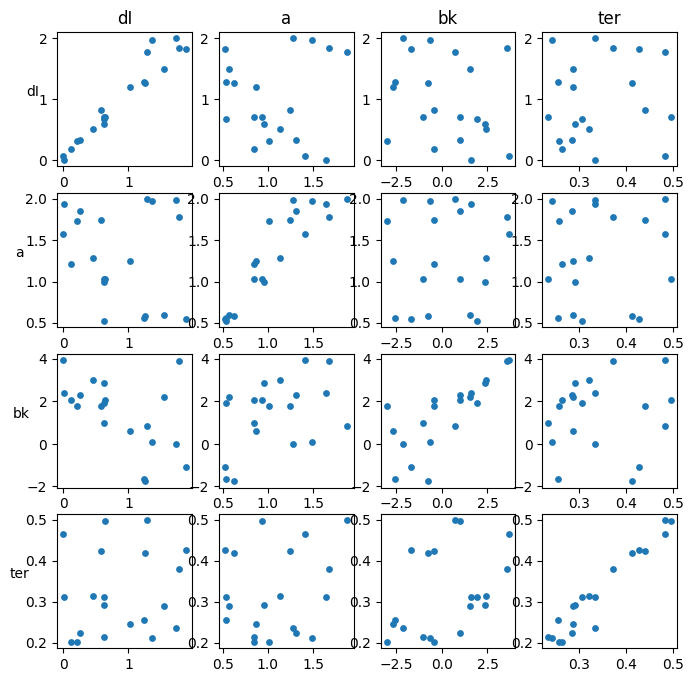

In [29]:
# DE LossRobustLikelihood
#prior = utils.BoxUniform(low=[0, 0.6, -0.4, 0.2], high=[1, 1.5, 0, 0.5])

par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

In [ ]:
## Simulate from IDM and fit with LCA

In [131]:
n_trials = 1000
sim_num = 100

prior_IDM = utils.BoxUniform(low=[0,0.2,0.2,52000, 8200], high=[0.2,0.6,0.5,53000, 8600])
param_IDM = prior_IDM.sample((sim_num,))

par_fitted = np.zeros((sim_num,4))

In [133]:
for i in range(sim_num):
    print(i)
    IDM_o = simul_IDM_EM6(np.tile(param_IDM[i,:], (n_trials,1))) # simulate IDM data
    print(param_IDM[i,:])
    print(IDM_o[0:10,:])
    
    # rescale data
    IDM_o[:,1] = -IDM_o[:,1] + 1
    IDM_o = np.array(IDM_o[:,:])
    samp = Sample.from_numpy_array(IDM_o, column_names = [])
    
    
    
    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=2),
                                        t = 0,
                                        x=Fittable(minval=-30, maxval=30)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.5, maxval=2)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.2, maxval=0.5)),
                      dx=.001, dt=.001, T_dur=3)
                      #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(param_IDM[i,:])
    print(par_fitted[i,:])
    


0
sim0
tensor([1.7057e-01, 2.8809e-01, 4.0580e-01, 5.2674e+04, 8.3595e+03])
tensor([[0.7728, 1.0000],
        [0.5048, 0.0000],
        [0.6458, 1.0000],
        [0.5748, 1.0000],
        [0.5538, 1.0000],
        [0.5388, 1.0000],
        [0.5808, 1.0000],
        [0.5198, 1.0000],
        [0.5948, 1.0000],
        [0.5378, 0.0000]])


Info: Params [ 1.53163119 13.43278968  0.66978156  0.44562875] gave -1574.7696314174786


tensor([1.7057e-01, 2.8809e-01, 4.0580e-01, 5.2674e+04, 8.3595e+03])
[ 1.53163119  0.66978156  0.44562875 13.43278968]
1
sim0
tensor([1.9329e-01, 4.7103e-01, 2.0348e-01, 5.2753e+04, 8.5127e+03])
tensor([[0.3755, 0.0000],
        [0.2725, 0.0000],
        [0.3095, 1.0000],
        [0.3275, 0.0000],
        [0.2975, 1.0000],
        [0.3555, 1.0000],
        [0.3365, 0.0000],
        [0.2305, 0.0000],
        [0.3375, 1.0000],
        [0.2815, 0.0000]])


Info: Params [ 1.72098069 15.16436252  0.68383887  0.21409157] gave -1809.821373724793


tensor([1.9329e-01, 4.7103e-01, 2.0348e-01, 5.2753e+04, 8.5127e+03])
[ 1.72098069  0.68383887  0.21409157 15.16436252]
2
sim0
tensor([5.7987e-02, 4.3051e-01, 4.8987e-01, 5.2381e+04, 8.5789e+03])
tensor([[0.6499, 0.0000],
        [0.6709, 1.0000],
        [0.6529, 0.0000],
        [0.5779, 0.0000],
        [0.6879, 1.0000],
        [0.6329, 1.0000],
        [0.5379, 0.0000],
        [0.6619, 0.0000],
        [0.6829, 1.0000],
        [0.6369, 0.0000]])


Info: Params [0.68970361 9.05892582 0.7648741  0.49978622] gave -616.8259139761666


tensor([5.7987e-02, 4.3051e-01, 4.8987e-01, 5.2381e+04, 8.5789e+03])
[0.68970361 0.7648741  0.49978622 9.05892582]
3
sim0
tensor([7.9197e-02, 4.6730e-01, 4.5977e-01, 5.2519e+04, 8.3805e+03])
tensor([[0.5448, 0.0000],
        [0.6748, 0.0000],
        [0.6108, 0.0000],
        [0.5398, 1.0000],
        [0.7378, 1.0000],
        [0.5888, 0.0000],
        [0.5408, 0.0000],
        [0.6768, 0.0000],
        [0.7738, 0.0000],
        [0.5208, 0.0000]])


Info: Params [ 0.7476819  10.02920481  0.59689958  0.4744982 ] gave -973.0623230250262


tensor([7.9197e-02, 4.6730e-01, 4.5977e-01, 5.2519e+04, 8.3805e+03])
[ 0.7476819   0.59689958  0.4744982  10.02920481]
4
sim0
tensor([8.2207e-02, 3.4646e-01, 3.1461e-01, 5.2041e+04, 8.4783e+03])
tensor([[0.8826, 0.0000],
        [0.6456, 0.0000],
        [0.5006, 0.0000],
        [0.4296, 0.0000],
        [0.6126, 0.0000],
        [0.7086, 1.0000],
        [0.6346, 0.0000],
        [0.5596, 0.0000],
        [0.4946, 0.0000],
        [0.5836, 0.0000]])


Info: Params [0.71766042 4.60504055 0.72487442 0.34691128] gave 213.37217509746023


tensor([8.2207e-02, 3.4646e-01, 3.1461e-01, 5.2041e+04, 8.4783e+03])
[0.71766042 0.72487442 0.34691128 4.60504055]
5
sim0
tensor([8.3167e-02, 2.2655e-01, 2.2123e-01, 5.2599e+04, 8.2164e+03])
tensor([[0.3872, 1.0000],
        [0.3412, 0.0000],
        [0.3352, 0.0000],
        [0.4632, 0.0000],
        [0.4282, 1.0000],
        [0.4702, 0.0000],
        [0.3652, 1.0000],
        [0.3322, 1.0000],
        [0.3962, 0.0000],
        [0.3742, 0.0000]])


Info: Params [ 0.54580084 13.82440276  1.52601633  0.22193659] gave -1173.091295876728


tensor([8.3167e-02, 2.2655e-01, 2.2123e-01, 5.2599e+04, 8.2164e+03])
[ 0.54580084  1.52601633  0.22193659 13.82440276]
6
sim0
tensor([3.7106e-02, 4.0959e-01, 2.8480e-01, 5.2463e+04, 8.3253e+03])
tensor([[0.6538, 0.0000],
        [0.3878, 0.0000],
        [0.4808, 1.0000],
        [0.5228, 0.0000],
        [0.4488, 0.0000],
        [0.5098, 0.0000],
        [0.4178, 0.0000],
        [0.4008, 1.0000],
        [0.4148, 0.0000],
        [0.5088, 0.0000]])


Info: Params [ 0.268856   11.26114497  0.72960805  0.30155165] gave -885.1965826994079


tensor([3.7106e-02, 4.0959e-01, 2.8480e-01, 5.2463e+04, 8.3253e+03])
[ 0.268856    0.72960805  0.30155165 11.26114497]
7
sim0
tensor([1.8101e-01, 3.4061e-01, 4.6551e-01, 5.2851e+04, 8.2636e+03])
tensor([[0.7075, 0.0000],
        [0.5715, 0.0000],
        [0.6115, 0.0000],
        [0.5675, 0.0000],
        [0.6605, 1.0000],
        [0.5715, 0.0000],
        [0.6745, 1.0000],
        [0.5655, 0.0000],
        [0.6045, 1.0000],
        [0.5545, 0.0000]])


Info: Params [ 1.8355746  17.10007173  0.90021859  0.48366997] gave -1927.147736227526


tensor([1.8101e-01, 3.4061e-01, 4.6551e-01, 5.2851e+04, 8.2636e+03])
[ 1.8355746   0.90021859  0.48366997 17.10007173]
8
sim0
tensor([5.0723e-02, 2.9744e-01, 4.8514e-01, 5.2280e+04, 8.5721e+03])
tensor([[0.7821, 0.0000],
        [0.6131, 1.0000],
        [0.6111, 0.0000],
        [0.6281, 0.0000],
        [0.8171, 1.0000],
        [0.6441, 1.0000],
        [0.6291, 0.0000],
        [0.7411, 0.0000],
        [0.6091, 1.0000],
        [0.5981, 0.0000]])


Info: Params [0.37259796 7.81362253 0.92889201 0.49933036] gave -192.5136940010555


tensor([5.0723e-02, 2.9744e-01, 4.8514e-01, 5.2280e+04, 8.5721e+03])
[0.37259796 0.92889201 0.49933036 7.81362253]
9
sim0
tensor([1.3463e-01, 5.8428e-01, 2.8523e-01, 5.2937e+04, 8.3473e+03])
tensor([[0.3662, 1.0000],
        [0.3642, 0.0000],
        [0.3442, 1.0000],
        [0.3722, 1.0000],
        [0.3652, 0.0000],
        [0.3452, 0.0000],
        [0.3352, 1.0000],
        [0.3142, 1.0000],
        [0.3532, 0.0000],
        [0.3512, 0.0000]])


Info: Params [ 1.64201377 27.61901484  0.50599101  0.28391313] gave -2812.940891618219


tensor([1.3463e-01, 5.8428e-01, 2.8523e-01, 5.2937e+04, 8.3473e+03])
[ 1.64201377  0.50599101  0.28391313 27.61901484]
10
sim0
tensor([4.7817e-02, 4.8808e-01, 2.2992e-01, 5.2821e+04, 8.3161e+03])
tensor([[0.3289, 0.0000],
        [0.2739, 0.0000],
        [0.4119, 1.0000],
        [0.3019, 0.0000],
        [0.2719, 0.0000],
        [0.3239, 0.0000],
        [0.3369, 1.0000],
        [0.3289, 0.0000],
        [0.3499, 0.0000],
        [0.3529, 0.0000]])


Info: Params [ 0.65680998 16.6943081   0.66292924  0.23563167] gave -1576.297804706251


tensor([4.7817e-02, 4.8808e-01, 2.2992e-01, 5.2821e+04, 8.3161e+03])
[ 0.65680998  0.66292924  0.23563167 16.6943081 ]
11
sim0
tensor([7.9877e-02, 5.2641e-01, 4.2269e-01, 5.2402e+04, 8.5023e+03])
tensor([[0.5767, 0.0000],
        [0.4687, 0.0000],
        [0.5697, 0.0000],
        [0.4897, 0.0000],
        [0.6007, 0.0000],
        [0.4897, 0.0000],
        [0.4967, 0.0000],
        [0.6487, 0.0000],
        [0.6837, 0.0000],
        [0.4977, 0.0000]])


Info: Params [0.84737235 8.29167622 0.51278106 0.42980359] gave -991.4715418220172


tensor([7.9877e-02, 5.2641e-01, 4.2269e-01, 5.2402e+04, 8.5023e+03])
[0.84737235 0.51278106 0.42980359 8.29167622]
12
sim0
tensor([1.7750e-02, 3.3144e-01, 3.4319e-01, 5.2882e+04, 8.2050e+03])
tensor([[0.5542, 0.0000],
        [0.4402, 1.0000],
        [0.4222, 1.0000],
        [0.4542, 0.0000],
        [0.6182, 1.0000],
        [0.4952, 1.0000],
        [0.5572, 1.0000],
        [0.6222, 0.0000],
        [0.4872, 0.0000],
        [0.4872, 0.0000]])


Info: Params [ 0.22137741 18.53095082  0.99852794  0.35622009] gave -1696.9342401314311


tensor([1.7750e-02, 3.3144e-01, 3.4319e-01, 5.2882e+04, 8.2050e+03])
[ 0.22137741  0.99852794  0.35622009 18.53095082]
13
sim0
tensor([1.5290e-01, 4.7225e-01, 3.8654e-01, 5.2929e+04, 8.4175e+03])
tensor([[0.5335, 0.0000],
        [0.4775, 0.0000],
        [0.4795, 1.0000],
        [0.4295, 0.0000],
        [0.4545, 1.0000],
        [0.4225, 0.0000],
        [0.5315, 0.0000],
        [0.4605, 1.0000],
        [0.4335, 1.0000],
        [0.4425, 0.0000]])


Info: Params [ 1.66906347 18.30232719  0.6172827   0.40011445] gave -2105.67753438768


tensor([1.5290e-01, 4.7225e-01, 3.8654e-01, 5.2929e+04, 8.4175e+03])
[ 1.66906347  0.6172827   0.40011445 18.30232719]
14
sim0
tensor([1.2404e-01, 4.3818e-01, 3.7554e-01, 5.2349e+04, 8.5967e+03])
tensor([[0.6395, 1.0000],
        [0.5615, 1.0000],
        [0.5475, 0.0000],
        [0.4715, 0.0000],
        [0.5115, 0.0000],
        [0.4855, 0.0000],
        [0.4755, 1.0000],
        [0.7275, 1.0000],
        [0.4915, 0.0000],
        [0.5175, 0.0000]])


Info: Params [1.16909259 8.33301474 0.73090931 0.38444214] gave -724.3524834084284


tensor([1.2404e-01, 4.3818e-01, 3.7554e-01, 5.2349e+04, 8.5967e+03])
[1.16909259 0.73090931 0.38444214 8.33301474]
15
sim0
tensor([3.9690e-03, 2.7946e-01, 4.9831e-01, 5.2655e+04, 8.5190e+03])
tensor([[0.8713, 0.0000],
        [0.9533, 0.0000],
        [0.6153, 1.0000],
        [0.6853, 0.0000],
        [0.7073, 0.0000],
        [0.6603, 1.0000],
        [0.5853, 0.0000],
        [0.6953, 0.0000],
        [0.5723, 0.0000],
        [0.6933, 0.0000]])


Info: Params [ 0.11180873 14.35035373  1.77055154  0.47965103] gave -1132.1832701419034


tensor([3.9690e-03, 2.7946e-01, 4.9831e-01, 5.2655e+04, 8.5190e+03])
[ 0.11180873  1.77055154  0.47965103 14.35035373]
16
sim0
tensor([1.9639e-01, 3.6890e-01, 3.8224e-01, 5.2830e+04, 8.3049e+03])
tensor([[0.4532, 0.0000],
        [0.4662, 0.0000],
        [0.5022, 0.0000],
        [0.5252, 0.0000],
        [0.5112, 1.0000],
        [0.5352, 0.0000],
        [0.6392, 1.0000],
        [0.4512, 0.0000],
        [0.5452, 1.0000],
        [0.4672, 1.0000]])


Info: Params [ 1.84178108 15.90224902  0.68706249  0.40681945] gave -1919.8087922025607


tensor([1.9639e-01, 3.6890e-01, 3.8224e-01, 5.2830e+04, 8.3049e+03])
[ 1.84178108  0.68706249  0.40681945 15.90224902]
17
sim0
tensor([9.5703e-03, 3.3644e-01, 4.7109e-01, 5.2894e+04, 8.2351e+03])
tensor([[0.5821, 0.0000],
        [0.5391, 0.0000],
        [0.5981, 1.0000],
        [0.5411, 1.0000],
        [0.5311, 0.0000],
        [0.5491, 1.0000],
        [0.6391, 1.0000],
        [0.5691, 1.0000],
        [0.6171, 1.0000],
        [0.5831, 1.0000]])


Info: Params [ 0.18638993 18.28357506  0.93865943  0.48346449] gave -1713.6723812878704


tensor([9.5703e-03, 3.3644e-01, 4.7109e-01, 5.2894e+04, 8.2351e+03])
[ 0.18638993  0.93865943  0.48346449 18.28357506]
18
sim0
tensor([1.5450e-02, 3.3574e-01, 2.9354e-01, 5.2691e+04, 8.2723e+03])
tensor([[0.7075, 0.0000],
        [0.4195, 0.0000],
        [0.4695, 1.0000],
        [0.5045, 1.0000],
        [0.5575, 0.0000],
        [0.4385, 0.0000],
        [0.4225, 0.0000],
        [0.4035, 0.0000],
        [0.4945, 1.0000],
        [0.5585, 0.0000]])


Info: Params [ 0.         13.65351903  0.82113189  0.31004256] gave -1192.857104068199


tensor([1.5450e-02, 3.3574e-01, 2.9354e-01, 5.2691e+04, 8.2723e+03])
[ 0.          0.82113189  0.31004256 13.65351903]
19
sim0
tensor([1.1397e-01, 4.8386e-01, 3.6346e-01, 5.2032e+04, 8.3589e+03])
tensor([[0.5475, 0.0000],
        [0.5205, 0.0000],
        [0.4555, 0.0000],
        [0.4555, 1.0000],
        [0.5475, 0.0000],
        [0.9905, 0.0000],
        [0.5075, 1.0000],
        [0.6085, 0.0000],
        [0.5745, 1.0000],
        [0.4425, 0.0000]])


Info: Params [0.99307868 3.34077435 0.59226574 0.38005999] gave -80.75472902615758


tensor([1.1397e-01, 4.8386e-01, 3.6346e-01, 5.2032e+04, 8.3589e+03])
[0.99307868 0.59226574 0.38005999 3.34077435]
20
sim0
tensor([1.6395e-01, 3.3268e-01, 4.0440e-01, 5.2162e+04, 8.3793e+03])
tensor([[1.1234, 0.0000],
        [0.6174, 1.0000],
        [0.6054, 0.0000],
        [0.4874, 0.0000],
        [0.6914, 0.0000],
        [0.5644, 1.0000],
        [0.5334, 0.0000],
        [0.6124, 0.0000],
        [0.5304, 1.0000],
        [0.7814, 0.0000]])


Info: Params [1.3821819  6.17058454 0.7366768  0.43041723] gave -514.3417944019758


tensor([1.6395e-01, 3.3268e-01, 4.0440e-01, 5.2162e+04, 8.3793e+03])
[1.3821819  0.7366768  0.43041723 6.17058454]
21
sim0
tensor([9.1077e-02, 2.7290e-01, 3.2223e-01, 5.2905e+04, 8.3235e+03])
tensor([[0.5052, 1.0000],
        [0.4512, 1.0000],
        [0.4482, 0.0000],
        [0.5212, 0.0000],
        [0.4132, 0.0000],
        [0.4352, 0.0000],
        [0.4492, 0.0000],
        [0.4342, 1.0000],
        [0.4642, 0.0000],
        [0.4812, 1.0000]])


Info: Params [ 0.87227223 18.37738345  1.10509455  0.33986752] gave -1743.6862715877455


tensor([9.1077e-02, 2.7290e-01, 3.2223e-01, 5.2905e+04, 8.3235e+03])
[ 0.87227223  1.10509455  0.33986752 18.37738345]
22
sim0
tensor([1.0224e-01, 3.5638e-01, 2.4109e-01, 5.2310e+04, 8.5941e+03])
tensor([[0.3401, 0.0000],
        [0.4651, 0.0000],
        [0.3711, 0.0000],
        [0.5341, 0.0000],
        [0.6611, 1.0000],
        [0.7031, 1.0000],
        [0.4591, 1.0000],
        [0.4041, 1.0000],
        [0.5001, 0.0000],
        [0.4631, 0.0000]])


Info: Params [0.86854198 7.87041284 0.73920545 0.26625509] gave -504.0233699605585


tensor([1.0224e-01, 3.5638e-01, 2.4109e-01, 5.2310e+04, 8.5941e+03])
[0.86854198 0.73920545 0.26625509 7.87041284]
23
sim0
tensor([1.1875e-01, 3.8037e-01, 4.5804e-01, 5.2362e+04, 8.2448e+03])
tensor([[0.6810, 0.0000],
        [0.6700, 1.0000],
        [0.7320, 0.0000],
        [0.6900, 0.0000],
        [0.7560, 0.0000],
        [0.5610, 0.0000],
        [0.5850, 0.0000],
        [0.8480, 0.0000],
        [0.6050, 0.0000],
        [0.7500, 0.0000]])


Info: Params [ 1.00675951 10.47832095  0.81754572  0.47121755] gave -963.9047899742877


tensor([1.1875e-01, 3.8037e-01, 4.5804e-01, 5.2362e+04, 8.2448e+03])
[ 1.00675951  0.81754572  0.47121755 10.47832095]
24
sim0
tensor([2.7388e-02, 3.1243e-01, 4.5629e-01, 5.2618e+04, 8.5886e+03])
tensor([[0.6083, 1.0000],
        [0.5453, 0.0000],
        [0.6193, 1.0000],
        [0.6183, 0.0000],
        [0.5273, 1.0000],
        [0.6753, 0.0000],
        [0.6483, 0.0000],
        [0.6693, 0.0000],
        [0.8253, 0.0000],
        [0.6043, 1.0000]])


Info: Params [ 0.11616416 11.46587516  0.71656182  0.48481522] gave -924.3508410883387


tensor([2.7388e-02, 3.1243e-01, 4.5629e-01, 5.2618e+04, 8.5886e+03])
[ 0.11616416  0.71656182  0.48481522 11.46587516]
25
sim0
tensor([1.6727e-02, 4.3069e-01, 2.3903e-01, 5.2596e+04, 8.2447e+03])
tensor([[0.3890, 0.0000],
        [0.5110, 1.0000],
        [0.3800, 0.0000],
        [0.5330, 0.0000],
        [0.4490, 1.0000],
        [0.3640, 0.0000],
        [0.2890, 0.0000],
        [0.4270, 0.0000],
        [0.3420, 0.0000],
        [0.5510, 0.0000]])


Info: Params [ 0.12869971 12.04829278  0.62202311  0.25683564] gave -1130.5006552690857


tensor([1.6727e-02, 4.3069e-01, 2.3903e-01, 5.2596e+04, 8.2447e+03])
[ 0.12869971  0.62202311  0.25683564 12.04829278]
26
sim0
tensor([7.7758e-02, 3.1445e-01, 3.7681e-01, 5.2256e+04, 8.5798e+03])
tensor([[0.5988, 0.0000],
        [0.5728, 1.0000],
        [0.6898, 0.0000],
        [0.6418, 1.0000],
        [0.5638, 0.0000],
        [0.6058, 0.0000],
        [0.8518, 0.0000],
        [0.6188, 0.0000],
        [1.3938, 0.0000],
        [0.6358, 1.0000]])


Info: Params [0.87245786 7.04321946 0.75789103 0.40756799] gave -325.7122515906154


tensor([7.7758e-02, 3.1445e-01, 3.7681e-01, 5.2256e+04, 8.5798e+03])
[0.87245786 0.75789103 0.40756799 7.04321946]
27
sim0
tensor([1.1263e-01, 2.6630e-01, 4.3827e-01, 5.2489e+04, 8.5960e+03])
tensor([[0.7523, 1.0000],
        [0.5893, 0.0000],
        [0.5783, 1.0000],
        [0.6213, 0.0000],
        [0.5883, 1.0000],
        [0.5823, 0.0000],
        [0.7423, 1.0000],
        [0.6303, 1.0000],
        [0.7023, 0.0000],
        [0.9013, 0.0000]])


Info: Params [0.95610816 9.33858362 0.64857026 0.48531984] gave -870.293723139828


tensor([1.1263e-01, 2.6630e-01, 4.3827e-01, 5.2489e+04, 8.5960e+03])
[0.95610816 0.64857026 0.48531984 9.33858362]
28
sim0
tensor([6.3056e-02, 4.1941e-01, 4.7402e-01, 5.2686e+04, 8.4022e+03])
tensor([[0.7450, 1.0000],
        [0.5920, 1.0000],
        [0.6410, 1.0000],
        [0.7310, 0.0000],
        [0.5320, 0.0000],
        [0.5940, 1.0000],
        [0.5490, 0.0000],
        [0.5920, 1.0000],
        [0.6270, 0.0000],
        [0.5760, 1.0000]])


Info: Params [ 0.48227344 13.63159474  0.6783835   0.49224478] gave -1252.1835797305666


tensor([6.3056e-02, 4.1941e-01, 4.7402e-01, 5.2686e+04, 8.4022e+03])
[ 0.48227344  0.6783835   0.49224478 13.63159474]
29
sim0
tensor([1.9052e-01, 2.2763e-01, 4.8011e-01, 5.2515e+04, 8.3222e+03])
tensor([[0.6191, 0.0000],
        [0.6571, 0.0000],
        [0.8961, 1.0000],
        [0.6941, 0.0000],
        [0.6891, 0.0000],
        [0.5741, 0.0000],
        [0.6081, 0.0000],
        [0.8001, 0.0000],
        [0.7391, 0.0000],
        [0.7371, 0.0000]])


Info: Params [ 1.87750615 10.97847769  1.05212928  0.49811072] gave -1444.7930171756793


tensor([1.9052e-01, 2.2763e-01, 4.8011e-01, 5.2515e+04, 8.3222e+03])
[ 1.87750615  1.05212928  0.49811072 10.97847769]
30
sim0
tensor([1.5876e-01, 3.4155e-01, 4.0185e-01, 5.2791e+04, 8.2585e+03])
tensor([[0.6058, 0.0000],
        [0.4778, 0.0000],
        [0.5778, 0.0000],
        [0.4908, 0.0000],
        [0.4598, 0.0000],
        [0.5368, 0.0000],
        [0.5908, 0.0000],
        [0.5768, 0.0000],
        [0.4698, 0.0000],
        [0.5968, 0.0000]])


Info: Params [ 1.51186855 16.57564141  0.78144313  0.42571733] gave -1832.9309606921802


tensor([1.5876e-01, 3.4155e-01, 4.0185e-01, 5.2791e+04, 8.2585e+03])
[ 1.51186855  0.78144313  0.42571733 16.57564141]
31
sim0
tensor([4.9883e-02, 3.1057e-01, 2.1613e-01, 5.2522e+04, 8.3517e+03])
tensor([[0.6601, 1.0000],
        [0.4381, 1.0000],
        [0.3711, 0.0000],
        [0.3361, 1.0000],
        [0.3421, 0.0000],
        [0.4291, 1.0000],
        [0.5941, 1.0000],
        [0.3821, 0.0000],
        [0.3641, 1.0000],
        [0.5211, 1.0000]])


Info: Params [ 0.29880169 11.68812494  0.84711098  0.23774868] gave -904.0626706377402


tensor([4.9883e-02, 3.1057e-01, 2.1613e-01, 5.2522e+04, 8.3517e+03])
[ 0.29880169  0.84711098  0.23774868 11.68812494]
32
sim0
tensor([2.5176e-02, 5.8608e-01, 4.9639e-01, 5.2705e+04, 8.4683e+03])
tensor([[0.5964, 0.0000],
        [0.5454, 1.0000],
        [0.6574, 1.0000],
        [0.5574, 0.0000],
        [0.5584, 0.0000],
        [0.5434, 0.0000],
        [0.8564, 0.0000],
        [0.5824, 1.0000],
        [0.5864, 0.0000],
        [0.5744, 1.0000]])


Info: Params [ 0.11910919 22.12648399  0.50741315  0.49170321] gave -2231.8173631743534


tensor([2.5176e-02, 5.8608e-01, 4.9639e-01, 5.2705e+04, 8.4683e+03])
[ 0.11910919  0.50741315  0.49170321 22.12648399]
33
sim0
tensor([1.1465e-01, 2.4568e-01, 4.7827e-01, 5.2931e+04, 8.2686e+03])
tensor([[0.6203, 0.0000],
        [0.6353, 0.0000],
        [0.6033, 0.0000],
        [0.5943, 0.0000],
        [0.5953, 0.0000],
        [0.6973, 0.0000],
        [0.6283, 1.0000],
        [0.5803, 0.0000],
        [0.7473, 1.0000],
        [0.6073, 0.0000]])


Info: Params [ 1.07735383 19.16707611  1.31652997  0.49138366] gave -1825.7572644756774


tensor([1.1465e-01, 2.4568e-01, 4.7827e-01, 5.2931e+04, 8.2686e+03])
[ 1.07735383  1.31652997  0.49138366 19.16707611]
34
sim0
tensor([6.0207e-02, 4.9460e-01, 4.3444e-01, 5.2174e+04, 8.5951e+03])
tensor([[0.5574, 0.0000],
        [0.5314, 0.0000],
        [0.5984, 0.0000],
        [0.7154, 1.0000],
        [0.7404, 0.0000],
        [0.7204, 1.0000],
        [0.7544, 1.0000],
        [0.5464, 1.0000],
        [0.6634, 0.0000],
        [0.5864, 0.0000]])


Info: Params [0.49960303 5.37668745 0.64972047 0.43867712] gave -24.42752685545716


tensor([6.0207e-02, 4.9460e-01, 4.3444e-01, 5.2174e+04, 8.5951e+03])
[0.49960303 0.64972047 0.43867712 5.37668745]
35
sim0
tensor([1.0086e-01, 2.5275e-01, 3.0003e-01, 5.2229e+04, 8.3373e+03])
tensor([[0.4340, 1.0000],
        [0.4740, 1.0000],
        [0.6440, 0.0000],
        [0.4640, 1.0000],
        [0.8600, 0.0000],
        [0.4440, 0.0000],
        [0.7840, 0.0000],
        [0.5090, 0.0000],
        [0.6960, 1.0000],
        [0.6710, 0.0000]])


Info: Params [0.79198181 7.57721642 0.76950121 0.34234411] gave -391.986131794645


tensor([1.0086e-01, 2.5275e-01, 3.0003e-01, 5.2229e+04, 8.3373e+03])
[0.79198181 0.76950121 0.34234411 7.57721642]
36
sim0
tensor([1.4690e-01, 2.3579e-01, 2.5067e-01, 5.2350e+04, 8.4863e+03])
tensor([[0.6457, 0.0000],
        [0.5897, 0.0000],
        [0.3427, 0.0000],
        [0.4847, 0.0000],
        [0.4357, 1.0000],
        [0.5727, 0.0000],
        [0.4507, 0.0000],
        [0.3967, 0.0000],
        [0.5737, 0.0000],
        [0.5327, 1.0000]])


Info: Params [1.4062568  8.79654963 0.76620818 0.2958478 ] gave -893.5659987091643


tensor([1.4690e-01, 2.3579e-01, 2.5067e-01, 5.2350e+04, 8.4863e+03])
[1.4062568  0.76620818 0.2958478  8.79654963]
37
sim0
tensor([2.8350e-03, 4.2226e-01, 4.9991e-01, 5.2817e+04, 8.2971e+03])
tensor([[0.5789, 0.0000],
        [0.5519, 0.0000],
        [0.5949, 1.0000],
        [0.6229, 0.0000],
        [0.6779, 0.0000],
        [0.7209, 1.0000],
        [0.6819, 1.0000],
        [0.6149, 1.0000],
        [0.6169, 0.0000],
        [0.6069, 1.0000]])


Info: Params [ 0.08054133 16.78890481  1.10608137  0.49007865] gave -1479.7090939039454


tensor([2.8350e-03, 4.2226e-01, 4.9991e-01, 5.2817e+04, 8.2971e+03])
[ 0.08054133  1.10608137  0.49007865 16.78890481]
38
sim0
tensor([1.8007e-01, 2.1037e-01, 2.9316e-01, 5.2299e+04, 8.3734e+03])
tensor([[0.4182, 0.0000],
        [0.5752, 1.0000],
        [0.4272, 0.0000],
        [0.5012, 0.0000],
        [0.5242, 0.0000],
        [0.6372, 0.0000],
        [0.4542, 0.0000],
        [0.9242, 0.0000],
        [0.4962, 0.0000],
        [0.6412, 0.0000]])


Info: Params [1.57784195 8.82503278 0.81353808 0.34185344] gave -960.3620423463132


tensor([1.8007e-01, 2.1037e-01, 2.9316e-01, 5.2299e+04, 8.3734e+03])
[1.57784195 0.81353808 0.34185344 8.82503278]
39
sim0
tensor([1.0380e-01, 4.9941e-01, 2.9460e-01, 5.2519e+04, 8.2985e+03])
tensor([[0.4986, 0.0000],
        [0.5286, 0.0000],
        [0.3606, 0.0000],
        [0.4006, 1.0000],
        [0.4476, 0.0000],
        [0.3496, 0.0000],
        [0.5516, 0.0000],
        [0.4066, 0.0000],
        [0.3996, 1.0000],
        [0.3506, 0.0000]])


Info: Params [ 0.99403074 10.46495689  0.52572212  0.30712775] gave -1252.7681094528575


tensor([1.0380e-01, 4.9941e-01, 2.9460e-01, 5.2519e+04, 8.2985e+03])
[ 0.99403074  0.52572212  0.30712775 10.46495689]
40
sim0
tensor([7.0938e-02, 3.3076e-01, 4.8933e-01, 5.2859e+04, 8.3647e+03])
tensor([[0.6173, 1.0000],
        [0.6183, 0.0000],
        [0.5843, 0.0000],
        [0.6283, 1.0000],
        [0.7403, 1.0000],
        [0.5803, 0.0000],
        [0.5863, 1.0000],
        [0.6533, 0.0000],
        [0.6833, 0.0000],
        [0.6273, 0.0000]])


Info: Params [ 0.720877   17.82243874  1.38795261  0.48525099] gave -1628.1258917151576


tensor([7.0938e-02, 3.3076e-01, 4.8933e-01, 5.2859e+04, 8.3647e+03])
[ 0.720877    1.38795261  0.48525099 17.82243874]
41
sim0
tensor([1.2852e-01, 5.0239e-01, 2.2660e-01, 5.2086e+04, 8.4280e+03])
tensor([[0.4036, 0.0000],
        [0.4536, 1.0000],
        [0.4386, 0.0000],
        [0.3876, 0.0000],
        [0.5046, 0.0000],
        [0.4276, 0.0000],
        [1.0306, 1.0000],
        [0.3236, 0.0000],
        [0.6026, 0.0000],
        [0.6046, 1.0000]])


Info: Params [1.08535563 5.09827998 0.61935517 0.23484928] gave -348.7080080630658


tensor([1.2852e-01, 5.0239e-01, 2.2660e-01, 5.2086e+04, 8.4280e+03])
[1.08535563 0.61935517 0.23484928 5.09827998]
42
sim0
tensor([5.3171e-02, 5.2477e-01, 2.9984e-01, 5.2851e+04, 8.2961e+03])
tensor([[0.4748, 0.0000],
        [0.3428, 0.0000],
        [0.4328, 0.0000],
        [0.3798, 0.0000],
        [0.3488, 0.0000],
        [0.4158, 1.0000],
        [0.3968, 0.0000],
        [0.4278, 0.0000],
        [0.4018, 0.0000],
        [0.4478, 1.0000]])


Info: Params [ 0.40970588 20.1601211   0.87445178  0.28632823] gave -1870.8989244166764


tensor([5.3171e-02, 5.2477e-01, 2.9984e-01, 5.2851e+04, 8.2961e+03])
[ 0.40970588  0.87445178  0.28632823 20.1601211 ]
43
sim0
tensor([9.2418e-02, 3.7049e-01, 4.7113e-01, 5.2559e+04, 8.3278e+03])
tensor([[0.8041, 0.0000],
        [0.5791, 1.0000],
        [0.5951, 0.0000],
        [0.5751, 0.0000],
        [0.7581, 0.0000],
        [0.6341, 0.0000],
        [0.6771, 0.0000],
        [0.6161, 1.0000],
        [0.6361, 1.0000],
        [0.8391, 1.0000]])


Info: Params [ 0.84360717 12.7578299   0.73845956  0.49556473] gave -1219.780621143162


tensor([9.2418e-02, 3.7049e-01, 4.7113e-01, 5.2559e+04, 8.3278e+03])
[ 0.84360717  0.73845956  0.49556473 12.7578299 ]
44
sim0
tensor([4.0467e-02, 3.2368e-01, 2.3718e-01, 5.2954e+04, 8.2530e+03])
tensor([[0.4462, 1.0000],
        [0.4122, 0.0000],
        [0.4102, 1.0000],
        [0.3152, 0.0000],
        [0.3582, 0.0000],
        [0.4212, 0.0000],
        [0.3322, 1.0000],
        [0.3772, 0.0000],
        [0.3372, 1.0000],
        [0.4052, 1.0000]])


Info: Params [ 0.35020564 19.15993277  1.18242452  0.24388595] gave -1746.0389016088166


tensor([4.0467e-02, 3.2368e-01, 2.3718e-01, 5.2954e+04, 8.2530e+03])
[ 0.35020564  1.18242452  0.24388595 19.15993277]
45
sim0
tensor([9.0935e-02, 3.8123e-01, 2.7121e-01, 5.2237e+04, 8.3467e+03])
tensor([[0.4612, 0.0000],
        [0.5692, 0.0000],
        [0.6102, 0.0000],
        [0.4912, 1.0000],
        [0.6232, 1.0000],
        [0.3732, 0.0000],
        [0.3802, 0.0000],
        [0.3352, 1.0000],
        [0.4352, 1.0000],
        [0.3642, 0.0000]])


Info: Params [0.9502157  6.81348167 0.61000585 0.30588471] gave -583.3598980139726


tensor([9.0935e-02, 3.8123e-01, 2.7121e-01, 5.2237e+04, 8.3467e+03])
[0.9502157  0.61000585 0.30588471 6.81348167]
46
sim0
tensor([6.9808e-02, 4.5153e-01, 4.7509e-01, 5.2451e+04, 8.3238e+03])
tensor([[0.6151, 1.0000],
        [0.5581, 1.0000],
        [0.7811, 1.0000],
        [0.6881, 0.0000],
        [0.5881, 1.0000],
        [1.0521, 1.0000],
        [0.5671, 0.0000],
        [0.7661, 0.0000],
        [0.6681, 0.0000],
        [0.6401, 0.0000]])


Info: Params [0.7428005  9.84485982 0.63305589 0.48969857] gave -896.0824469957811


tensor([6.9808e-02, 4.5153e-01, 4.7509e-01, 5.2451e+04, 8.3238e+03])
[0.7428005  0.63305589 0.48969857 9.84485982]
47
sim0
tensor([8.4305e-03, 4.7199e-01, 2.7883e-01, 5.2297e+04, 8.2517e+03])
tensor([[0.5728, 1.0000],
        [0.3728, 0.0000],
        [0.5018, 0.0000],
        [0.3308, 1.0000],
        [0.9818, 1.0000],
        [0.3528, 1.0000],
        [0.5638, 1.0000],
        [0.4078, 0.0000],
        [0.4758, 1.0000],
        [0.3928, 0.0000]])


Info: Params [0.09231752 8.18858574 0.64009707 0.29032921] gave -505.51972747380125


tensor([8.4305e-03, 4.7199e-01, 2.7883e-01, 5.2297e+04, 8.2517e+03])
[0.09231752 0.64009707 0.29032921 8.18858574]
48
sim0
tensor([4.5230e-02, 3.8984e-01, 3.3638e-01, 5.2303e+04, 8.4102e+03])
tensor([[0.5314, 0.0000],
        [0.3984, 1.0000],
        [0.5824, 0.0000],
        [0.5474, 0.0000],
        [0.6324, 1.0000],
        [0.5464, 1.0000],
        [0.4684, 0.0000],
        [0.7144, 0.0000],
        [0.4284, 0.0000],
        [0.4444, 0.0000]])


Info: Params [0.30723272 8.6679723  0.70171772 0.36311468] gave -515.4665285442455


tensor([4.5230e-02, 3.8984e-01, 3.3638e-01, 5.2303e+04, 8.4102e+03])
[0.30723272 0.70171772 0.36311468 8.6679723 ]
49
sim0
tensor([1.3866e-01, 4.4551e-01, 4.1136e-01, 5.2908e+04, 8.3863e+03])
tensor([[0.4814, 0.0000],
        [0.5854, 1.0000],
        [0.4974, 0.0000],
        [0.5044, 0.0000],
        [0.6094, 1.0000],
        [0.5034, 1.0000],
        [0.5204, 1.0000],
        [0.4964, 1.0000],
        [0.7534, 1.0000],
        [0.4664, 0.0000]])


Info: Params [ 1.48402157 17.52163367  0.78458437  0.41611666] gave -1931.1998362478175


tensor([1.3866e-01, 4.4551e-01, 4.1136e-01, 5.2908e+04, 8.3863e+03])
[ 1.48402157  0.78458437  0.41611666 17.52163367]
50
sim0
tensor([9.8213e-02, 2.1983e-01, 4.5404e-01, 5.2439e+04, 8.4761e+03])
tensor([[0.6630, 0.0000],
        [0.6860, 0.0000],
        [0.8340, 1.0000],
        [0.6770, 0.0000],
        [0.6980, 1.0000],
        [0.5630, 0.0000],
        [0.8900, 0.0000],
        [0.7130, 1.0000],
        [0.6610, 0.0000],
        [0.6820, 0.0000]])


Info: Params [ 0.7743769  10.78637195  1.07064693  0.47779331] gave -818.7962252241344


tensor([9.8213e-02, 2.1983e-01, 4.5404e-01, 5.2439e+04, 8.4761e+03])
[ 0.7743769   1.07064693  0.47779331 10.78637195]
51
sim0
tensor([2.2676e-02, 2.7223e-01, 4.7522e-01, 5.2616e+04, 8.3598e+03])
tensor([[0.6372, 0.0000],
        [0.5592, 0.0000],
        [0.6892, 0.0000],
        [0.7662, 1.0000],
        [0.6142, 0.0000],
        [0.6382, 0.0000],
        [0.6762, 1.0000],
        [0.6662, 0.0000],
        [0.6772, 1.0000],
        [0.5902, 1.0000]])


Info: Params [ 0.08327949 13.73977258  0.95869869  0.49744461] gave -1155.1757893929766


tensor([2.2676e-02, 2.7223e-01, 4.7522e-01, 5.2616e+04, 8.3598e+03])
[ 0.08327949  0.95869869  0.49744461 13.73977258]
52
sim0
tensor([1.1895e-01, 4.1351e-01, 4.1531e-01, 5.2893e+04, 8.3691e+03])
tensor([[0.5203, 0.0000],
        [0.4933, 0.0000],
        [0.5333, 0.0000],
        [0.5513, 1.0000],
        [0.4933, 1.0000],
        [0.4653, 0.0000],
        [0.5193, 0.0000],
        [0.7263, 1.0000],
        [0.6943, 0.0000],
        [0.5923, 0.0000]])


Info: Params [ 1.08522755 15.8304668   0.60936192  0.43411232] gave -1742.900174658695


tensor([1.1895e-01, 4.1351e-01, 4.1531e-01, 5.2893e+04, 8.3691e+03])
[ 1.08522755  0.60936192  0.43411232 15.8304668 ]
53
sim0
tensor([1.4327e-01, 2.9388e-01, 4.1227e-01, 5.2424e+04, 8.2116e+03])
tensor([[0.9013, 0.0000],
        [0.5273, 1.0000],
        [0.5693, 0.0000],
        [0.5833, 1.0000],
        [0.5193, 0.0000],
        [0.6163, 0.0000],
        [0.6223, 1.0000],
        [0.5783, 0.0000],
        [0.5943, 0.0000],
        [0.5083, 0.0000]])


Info: Params [ 1.43616124 11.11072176  0.95970517  0.43087436] gave -1140.7693659109054


tensor([1.4327e-01, 2.9388e-01, 4.1227e-01, 5.2424e+04, 8.2116e+03])
[ 1.43616124  0.95970517  0.43087436 11.11072176]
54
sim0
tensor([5.9787e-02, 2.6606e-01, 2.3198e-01, 5.2250e+04, 8.4937e+03])
tensor([[0.4150, 0.0000],
        [0.7560, 1.0000],
        [0.3950, 1.0000],
        [0.5990, 1.0000],
        [0.4180, 0.0000],
        [0.3870, 0.0000],
        [0.7310, 0.0000],
        [0.3610, 0.0000],
        [0.3760, 0.0000],
        [0.4000, 0.0000]])


Info: Params [0.54185825 6.94809279 0.74617706 0.2749268 ] gave -176.5598550153005


tensor([5.9787e-02, 2.6606e-01, 2.3198e-01, 5.2250e+04, 8.4937e+03])
[0.54185825 0.74617706 0.2749268  6.94809279]
55
sim0
tensor([9.1218e-02, 2.2233e-01, 2.4721e-01, 5.2708e+04, 8.5670e+03])
tensor([[0.5192, 0.0000],
        [0.4232, 0.0000],
        [0.4152, 1.0000],
        [0.3572, 1.0000],
        [0.3962, 0.0000],
        [0.3622, 1.0000],
        [0.4012, 0.0000],
        [0.3572, 0.0000],
        [0.3942, 1.0000],
        [0.4212, 0.0000]])


Info: Params [ 0.9691089  13.56685284  0.88530966  0.28316292] gave -1334.7456246853822


tensor([9.1218e-02, 2.2233e-01, 2.4721e-01, 5.2708e+04, 8.5670e+03])
[ 0.9691089   0.88530966  0.28316292 13.56685284]
56
sim0
tensor([1.4642e-01, 4.3648e-01, 4.3888e-01, 5.2929e+04, 8.4072e+03])
tensor([[0.7079, 0.0000],
        [0.5789, 0.0000],
        [0.5139, 0.0000],
        [0.5379, 0.0000],
        [0.5629, 0.0000],
        [0.5509, 0.0000],
        [0.5529, 0.0000],
        [0.5089, 0.0000],
        [0.5939, 1.0000],
        [0.5709, 0.0000]])


Info: Params [ 1.31616831 17.70883583  0.7040511   0.45280458] gave -1932.2336539402336


tensor([1.4642e-01, 4.3648e-01, 4.3888e-01, 5.2929e+04, 8.4072e+03])
[ 1.31616831  0.7040511   0.45280458 17.70883583]
57
sim0
tensor([5.0423e-02, 5.4841e-01, 3.4467e-01, 5.2283e+04, 8.3460e+03])
tensor([[0.4277, 1.0000],
        [0.4217, 0.0000],
        [0.5737, 1.0000],
        [0.3927, 0.0000],
        [0.5457, 1.0000],
        [0.4117, 0.0000],
        [0.4687, 1.0000],
        [0.7477, 0.0000],
        [0.4377, 0.0000],
        [0.4447, 1.0000]])


Info: Params [0.45914538 7.33310502 0.52305846 0.34482894] gave -723.1317203714315


tensor([5.0423e-02, 5.4841e-01, 3.4467e-01, 5.2283e+04, 8.3460e+03])
[0.45914538 0.52305846 0.34482894 7.33310502]
58
sim0
tensor([1.9901e-01, 4.9773e-01, 2.5466e-01, 5.2032e+04, 8.5071e+03])
tensor([[0.3797, 0.0000],
        [0.3937, 0.0000],
        [0.4617, 0.0000],
        [0.5047, 0.0000],
        [0.3697, 0.0000],
        [0.3867, 0.0000],
        [0.4077, 1.0000],
        [0.4047, 0.0000],
        [0.3877, 1.0000],
        [0.5727, 0.0000]])


Info: Params [1.74506609 4.16914976 0.63442837 0.25950286] gave -721.3718725031332


tensor([1.9901e-01, 4.9773e-01, 2.5466e-01, 5.2032e+04, 8.5071e+03])
[1.74506609 0.63442837 0.25950286 4.16914976]
59
sim0
tensor([1.1913e-01, 5.0499e-01, 3.7287e-01, 5.2347e+04, 8.2811e+03])
tensor([[0.6149, 1.0000],
        [0.4419, 0.0000],
        [0.6219, 0.0000],
        [0.4709, 0.0000],
        [0.5949, 0.0000],
        [0.5129, 0.0000],
        [0.4449, 0.0000],
        [0.5259, 0.0000],
        [0.4439, 0.0000],
        [0.4609, 0.0000]])


Info: Params [0.97102887 7.75155505 0.53474121 0.38405138] gave -892.8661585596806


tensor([1.1913e-01, 5.0499e-01, 3.7287e-01, 5.2347e+04, 8.2811e+03])
[0.97102887 0.53474121 0.38405138 7.75155505]
60
sim0
tensor([9.9502e-02, 3.3503e-01, 2.5506e-01, 5.2824e+04, 8.5618e+03])
tensor([[0.3671, 0.0000],
        [0.3511, 0.0000],
        [0.3651, 0.0000],
        [0.3681, 1.0000],
        [0.3961, 0.0000],
        [0.3411, 0.0000],
        [0.4301, 0.0000],
        [0.3691, 1.0000],
        [0.3171, 1.0000],
        [0.3891, 0.0000]])


Info: Params [ 1.0260645  14.61304789  0.71758814  0.28123285] gave -1562.4880817593298


tensor([9.9502e-02, 3.3503e-01, 2.5506e-01, 5.2824e+04, 8.5618e+03])
[ 1.0260645   0.71758814  0.28123285 14.61304789]
61
sim0
tensor([1.6545e-01, 5.7611e-01, 3.2865e-01, 5.2884e+04, 8.4357e+03])
tensor([[0.3956, 0.0000],
        [0.3666, 0.0000],
        [0.3766, 1.0000],
        [0.4046, 0.0000],
        [0.4486, 1.0000],
        [0.4086, 1.0000],
        [0.4356, 1.0000],
        [0.5576, 1.0000],
        [0.3956, 0.0000],
        [0.3796, 0.0000]])


Info: Params [ 1.57866385 23.28230021  0.50648688  0.32609327] gave -2550.6505700873336


tensor([1.6545e-01, 5.7611e-01, 3.2865e-01, 5.2884e+04, 8.4357e+03])
[ 1.57866385  0.50648688  0.32609327 23.28230021]
62
sim0
tensor([6.1310e-02, 4.1000e-01, 4.0349e-01, 5.2328e+04, 8.2134e+03])
tensor([[0.8325, 0.0000],
        [0.4895, 1.0000],
        [0.5785, 0.0000],
        [0.8495, 0.0000],
        [0.5815, 1.0000],
        [0.5915, 0.0000],
        [0.6055, 0.0000],
        [0.5855, 1.0000],
        [0.8065, 1.0000],
        [0.4975, 1.0000]])


Info: Params [0.57325926 9.03151906 0.67402063 0.41970698] gave -666.9002781377357


tensor([6.1310e-02, 4.1000e-01, 4.0349e-01, 5.2328e+04, 8.2134e+03])
[0.57325926 0.67402063 0.41970698 9.03151906]
63
sim0
tensor([1.2594e-01, 4.2395e-01, 2.1175e-01, 5.2689e+04, 8.3952e+03])
tensor([[0.2848, 0.0000],
        [0.3508, 1.0000],
        [0.3468, 1.0000],
        [0.4128, 0.0000],
        [0.3148, 1.0000],
        [0.5118, 0.0000],
        [0.3888, 1.0000],
        [0.3048, 0.0000],
        [0.4468, 1.0000],
        [0.2528, 0.0000]])


Info: Params [ 1.29237248 13.71929794  0.74893346  0.2224616 ] gave -1460.1285102175007


tensor([1.2594e-01, 4.2395e-01, 2.1175e-01, 5.2689e+04, 8.3952e+03])
[ 1.29237248  0.74893346  0.2224616  13.71929794]
64
sim0
tensor([4.6290e-02, 3.8118e-01, 2.1059e-01, 5.2501e+04, 8.2290e+03])
tensor([[0.3196, 0.0000],
        [0.3396, 0.0000],
        [0.3316, 1.0000],
        [0.6026, 1.0000],
        [0.4216, 0.0000],
        [0.4096, 0.0000],
        [0.3566, 0.0000],
        [0.3916, 0.0000],
        [0.3946, 0.0000],
        [0.3386, 0.0000]])


Info: Params [ 0.62429938 12.23035989  0.87467656  0.22278357] gave -1032.0999152902245


tensor([4.6290e-02, 3.8118e-01, 2.1059e-01, 5.2501e+04, 8.2290e+03])
[ 0.62429938  0.87467656  0.22278357 12.23035989]
65
sim0
tensor([1.9520e-01, 5.0633e-01, 3.7047e-01, 5.2827e+04, 8.2933e+03])
tensor([[0.4615, 1.0000],
        [0.4455, 0.0000],
        [0.5765, 0.0000],
        [0.4315, 0.0000],
        [0.4415, 0.0000],
        [0.4175, 0.0000],
        [0.4475, 0.0000],
        [0.4675, 0.0000],
        [0.4025, 0.0000],
        [0.5565, 0.0000]])


Info: Params [ 1.89988974 15.19840808  0.50823576  0.38012169] gave -2091.8661929271834


tensor([1.9520e-01, 5.0633e-01, 3.7047e-01, 5.2827e+04, 8.2933e+03])
[ 1.89988974  0.50823576  0.38012169 15.19840808]
66
sim0
tensor([1.9900e-01, 4.1086e-01, 4.0869e-01, 5.2530e+04, 8.5701e+03])
tensor([[0.5287, 0.0000],
        [0.5237, 1.0000],
        [0.5827, 0.0000],
        [0.6787, 1.0000],
        [0.5197, 1.0000],
        [0.4997, 1.0000],
        [0.6307, 0.0000],
        [0.5057, 0.0000],
        [0.6207, 0.0000],
        [0.5427, 0.0000]])


Info: Params [ 1.936198   10.42314133  0.74076186  0.42178934] gave -1471.7199986012733


tensor([1.9900e-01, 4.1086e-01, 4.0869e-01, 5.2530e+04, 8.5701e+03])
[ 1.936198    0.74076186  0.42178934 10.42314133]
67
sim0
tensor([5.9217e-02, 4.3658e-01, 2.0763e-01, 5.2350e+04, 8.5257e+03])
tensor([[0.2806, 1.0000],
        [0.3836, 0.0000],
        [0.3966, 0.0000],
        [0.2716, 0.0000],
        [0.6436, 1.0000],
        [0.4336, 0.0000],
        [0.3426, 0.0000],
        [0.4186, 0.0000],
        [0.3216, 0.0000],
        [0.2956, 1.0000]])


Info: Params [0.53846367 8.81500619 0.70611692 0.22117791] gave -601.5315274718961


tensor([5.9217e-02, 4.3658e-01, 2.0763e-01, 5.2350e+04, 8.5257e+03])
[0.53846367 0.70611692 0.22117791 8.81500619]
68
sim0
tensor([7.8510e-02, 5.1055e-01, 2.8807e-01, 5.2726e+04, 8.3042e+03])
tensor([[0.4141, 1.0000],
        [0.4491, 1.0000],
        [0.4001, 0.0000],
        [0.3561, 0.0000],
        [0.4461, 0.0000],
        [0.3461, 0.0000],
        [0.3261, 1.0000],
        [0.3191, 0.0000],
        [0.3261, 0.0000],
        [0.3351, 1.0000]])


Info: Params [ 0.88283807 15.82933049  0.66670811  0.28993722] gave -1597.5533065570412


tensor([7.8510e-02, 5.1055e-01, 2.8807e-01, 5.2726e+04, 8.3042e+03])
[ 0.88283807  0.66670811  0.28993722 15.82933049]
69
sim0
tensor([1.5922e-01, 5.1866e-01, 4.7166e-01, 5.2963e+04, 8.2143e+03])
tensor([[0.5507, 0.0000],
        [0.6587, 0.0000],
        [0.5727, 0.0000],
        [0.6527, 0.0000],
        [0.5457, 1.0000],
        [0.5037, 0.0000],
        [0.6797, 0.0000],
        [0.5397, 0.0000],
        [0.5907, 0.0000],
        [0.5207, 1.0000]])


Info: Params [ 1.44546142 22.08214844  1.26886769  0.44626422] gave -2284.380992875429


tensor([1.5922e-01, 5.1866e-01, 4.7166e-01, 5.2963e+04, 8.2143e+03])
[ 1.44546142  1.26886769  0.44626422 22.08214844]
70
sim0
tensor([3.8485e-02, 3.5847e-01, 3.2486e-01, 5.2124e+04, 8.4705e+03])
tensor([[0.7129, 0.0000],
        [0.5219, 1.0000],
        [0.4389, 0.0000],
        [0.4959, 1.0000],
        [0.9789, 0.0000],
        [0.6689, 1.0000],
        [0.8759, 0.0000],
        [0.5229, 0.0000],
        [0.4899, 1.0000],
        [0.6209, 0.0000]])


Info: Params [0.35346391 5.27186299 0.72177101 0.35293796] gave 198.03722309328606


tensor([3.8485e-02, 3.5847e-01, 3.2486e-01, 5.2124e+04, 8.4705e+03])
[0.35346391 0.72177101 0.35293796 5.27186299]
71
sim0
tensor([2.4506e-02, 2.1387e-01, 3.8193e-01, 5.2423e+04, 8.4602e+03])
tensor([[0.6429, 1.0000],
        [0.7209, 1.0000],
        [0.9819, 1.0000],
        [0.5759, 1.0000],
        [0.5529, 1.0000],
        [0.7189, 1.0000],
        [0.5299, 1.0000],
        [0.9349, 0.0000],
        [0.4929, 1.0000],
        [0.7309, 0.0000]])


Info: Params [ 0.17421522 10.21057292  0.83834924  0.43376066] gave -648.9930074987984


tensor([2.4506e-02, 2.1387e-01, 3.8193e-01, 5.2423e+04, 8.4602e+03])
[ 0.17421522  0.83834924  0.43376066 10.21057292]
72
sim0
tensor([5.2173e-02, 5.5743e-01, 3.5765e-01, 5.2888e+04, 8.3366e+03])
tensor([[0.4207, 1.0000],
        [0.3907, 0.0000],
        [0.4097, 0.0000],
        [0.4067, 0.0000],
        [0.4067, 0.0000],
        [0.3847, 1.0000],
        [0.4827, 1.0000],
        [0.4377, 0.0000],
        [0.4467, 0.0000],
        [0.3987, 0.0000]])


Info: Params [ 0.42454222 20.60987584  0.51719305  0.35750977] gave -2149.695397711338


tensor([5.2173e-02, 5.5743e-01, 3.5765e-01, 5.2888e+04, 8.3366e+03])
[ 0.42454222  0.51719305  0.35750977 20.60987584]
73
sim0
tensor([2.0177e-03, 5.2571e-01, 2.6402e-01, 5.2379e+04, 8.5501e+03])
tensor([[0.3610, 0.0000],
        [0.3540, 1.0000],
        [0.2900, 1.0000],
        [0.3300, 0.0000],
        [0.3640, 0.0000],
        [0.6410, 0.0000],
        [0.3330, 1.0000],
        [0.2920, 0.0000],
        [0.3170, 1.0000],
        [0.4210, 1.0000]])


Info: Params [0.04351032 9.69287287 0.63526565 0.2623481 ] gave -746.6912839516925


tensor([2.0177e-03, 5.2571e-01, 2.6402e-01, 5.2379e+04, 8.5501e+03])
[0.04351032 0.63526565 0.2623481  9.69287287]
74
sim0
tensor([6.2227e-02, 5.7871e-01, 4.9075e-01, 5.2716e+04, 8.2279e+03])
tensor([[0.5277, 1.0000],
        [0.5157, 0.0000],
        [0.5767, 0.0000],
        [0.5347, 1.0000],
        [0.5137, 1.0000],
        [0.6427, 1.0000],
        [0.5717, 0.0000],
        [0.5387, 0.0000],
        [0.5197, 0.0000],
        [0.5237, 1.0000]])


Info: Params [ 0.67316097 22.15324579  0.50848823  0.48801382] gave -2290.712702390418


tensor([6.2227e-02, 5.7871e-01, 4.9075e-01, 5.2716e+04, 8.2279e+03])
[ 0.67316097  0.50848823  0.48801382 22.15324579]
75
sim0
tensor([8.5343e-02, 4.2134e-01, 4.6343e-01, 5.2563e+04, 8.3254e+03])
tensor([[0.6674, 1.0000],
        [0.5514, 0.0000],
        [0.7654, 0.0000],
        [0.5924, 1.0000],
        [0.5314, 0.0000],
        [0.8564, 0.0000],
        [0.5444, 0.0000],
        [0.5454, 1.0000],
        [0.7394, 0.0000],
        [0.5934, 0.0000]])


Info: Params [ 0.93962269 13.07098321  0.77602611  0.47445009] gave -1255.3229295488477


tensor([8.5343e-02, 4.2134e-01, 4.6343e-01, 5.2563e+04, 8.3254e+03])
[ 0.93962269  0.77602611  0.47445009 13.07098321]
76
sim0
tensor([1.7380e-02, 2.3530e-01, 4.1892e-01, 5.2819e+04, 8.4333e+03])
tensor([[0.6219, 0.0000],
        [0.6059, 1.0000],
        [0.6659, 0.0000],
        [0.6409, 1.0000],
        [0.6599, 1.0000],
        [0.7089, 1.0000],
        [0.5999, 0.0000],
        [0.5839, 0.0000],
        [0.7009, 1.0000],
        [0.6889, 0.0000]])


Info: Params [ 0.14550062 16.4544333   1.81328193  0.41388019] gave -1398.5627154774693


tensor([1.7380e-02, 2.3530e-01, 4.1892e-01, 5.2819e+04, 8.4333e+03])
[ 0.14550062  1.81328193  0.41388019 16.4544333 ]
77
sim0
tensor([1.9176e-01, 2.6228e-01, 3.7794e-01, 5.2695e+04, 8.4677e+03])
tensor([[0.4839, 0.0000],
        [0.5669, 0.0000],
        [0.5149, 0.0000],
        [0.4859, 0.0000],
        [0.5869, 1.0000],
        [0.5459, 0.0000],
        [0.6439, 0.0000],
        [0.4869, 0.0000],
        [0.4639, 0.0000],
        [0.5199, 0.0000]])


Info: Params [ 1.81547333 13.80726999  0.85123805  0.40898548] gave -1667.36888407901


tensor([1.9176e-01, 2.6228e-01, 3.7794e-01, 5.2695e+04, 8.4677e+03])
[ 1.81547333  0.85123805  0.40898548 13.80726999]
78
sim0
tensor([9.9379e-02, 5.0358e-01, 3.7108e-01, 5.2921e+04, 8.5388e+03])
tensor([[0.5171, 1.0000],
        [0.4481, 1.0000],
        [0.5571, 0.0000],
        [0.4701, 1.0000],
        [0.4661, 0.0000],
        [0.4601, 0.0000],
        [0.6241, 1.0000],
        [0.4291, 0.0000],
        [0.4671, 0.0000],
        [0.4461, 0.0000]])


Info: Params [ 1.03537284 17.22907313  0.62596086  0.374461  ] gave -1846.1140017231796


tensor([9.9379e-02, 5.0358e-01, 3.7108e-01, 5.2921e+04, 8.5388e+03])
[ 1.03537284  0.62596086  0.374461   17.22907313]
79
sim0
tensor([1.5546e-01, 5.2049e-01, 2.7454e-01, 5.2069e+04, 8.3935e+03])
tensor([[0.4995, 1.0000],
        [1.0385, 0.0000],
        [0.5475, 1.0000],
        [0.3625, 0.0000],
        [0.3725, 0.0000],
        [0.4955, 0.0000],
        [0.3735, 0.0000],
        [0.5215, 0.0000],
        [0.7155, 0.0000],
        [0.4475, 1.0000]])


Info: Params [1.4512591  3.34706406 0.53313373 0.28582275] gave -637.7150749741205


tensor([1.5546e-01, 5.2049e-01, 2.7454e-01, 5.2069e+04, 8.3935e+03])
[1.4512591  0.53313373 0.28582275 3.34706406]
80
sim0
tensor([7.1335e-03, 5.7024e-01, 3.1003e-01, 5.2330e+04, 8.5570e+03])
tensor([[0.4530, 0.0000],
        [0.3680, 0.0000],
        [0.6020, 0.0000],
        [0.4280, 0.0000],
        [0.3720, 1.0000],
        [0.5120, 0.0000],
        [0.3460, 1.0000],
        [0.4300, 0.0000],
        [0.5200, 0.0000],
        [0.5080, 0.0000]])


Info: Params [6.73759297e-03 8.72862468e+00 5.00073367e-01 3.06010258e-01] gave -948.5760548042357


tensor([7.1335e-03, 5.7024e-01, 3.1003e-01, 5.2330e+04, 8.5570e+03])
[6.73759297e-03 5.00073367e-01 3.06010258e-01 8.72862468e+00]
81
sim0
tensor([7.3967e-02, 3.6343e-01, 4.6350e-01, 5.2411e+04, 8.2616e+03])
tensor([[0.6275, 0.0000],
        [0.6345, 0.0000],
        [0.6735, 0.0000],
        [0.5505, 0.0000],
        [0.6935, 1.0000],
        [0.7535, 0.0000],
        [0.7165, 1.0000],
        [0.5835, 0.0000],
        [0.7645, 1.0000],
        [0.6635, 1.0000]])


Info: Params [ 0.67725063 10.74500978  0.8349106   0.48045536] gave -833.700554521986


tensor([7.3967e-02, 3.6343e-01, 4.6350e-01, 5.2411e+04, 8.2616e+03])
[ 0.67725063  0.8349106   0.48045536 10.74500978]
82
sim0
tensor([1.3068e-01, 3.6311e-01, 2.0859e-01, 5.2805e+04, 8.2127e+03])
tensor([[0.3816, 0.0000],
        [0.3886, 0.0000],
        [0.2836, 1.0000],
        [0.2896, 0.0000],
        [0.4656, 1.0000],
        [0.3466, 0.0000],
        [0.3836, 0.0000],
        [0.3266, 1.0000],
        [0.3686, 0.0000],
        [0.3046, 0.0000]])


Info: Params [ 1.31481578 16.91824062  1.08905804  0.21303874] gave -1743.1069776751206


tensor([1.3068e-01, 3.6311e-01, 2.0859e-01, 5.2805e+04, 8.2127e+03])
[ 1.31481578  1.08905804  0.21303874 16.91824062]
83
sim0
tensor([1.4285e-01, 4.0767e-01, 4.6736e-01, 5.2157e+04, 8.4021e+03])
tensor([[0.8194, 0.0000],
        [0.5854, 1.0000],
        [0.8864, 0.0000],
        [0.7974, 0.0000],
        [0.9884, 0.0000],
        [0.5884, 0.0000],
        [0.8664, 0.0000],
        [0.8524, 1.0000],
        [0.5484, 0.0000],
        [0.6194, 0.0000]])


Info: Params [1.32142149 6.55624006 0.77710403 0.47812513] gave -462.82697354099923


tensor([1.4285e-01, 4.0767e-01, 4.6736e-01, 5.2157e+04, 8.4021e+03])
[1.32142149 0.77710403 0.47812513 6.55624006]
84
sim0
tensor([1.4993e-01, 5.1947e-01, 3.6904e-01, 5.2940e+04, 8.5015e+03])
tensor([[0.6070, 0.0000],
        [0.4090, 0.0000],
        [0.4260, 0.0000],
        [0.4820, 1.0000],
        [0.4510, 1.0000],
        [0.4310, 0.0000],
        [0.4590, 0.0000],
        [0.4190, 0.0000],
        [0.6640, 0.0000],
        [0.4560, 1.0000]])


Info: Params [ 1.41071764 17.53456573  0.54257091  0.37447602] gave -2028.2094646064834


tensor([1.4993e-01, 5.1947e-01, 3.6904e-01, 5.2940e+04, 8.5015e+03])
[ 1.41071764  0.54257091  0.37447602 17.53456573]
85
sim0
tensor([2.2399e-02, 5.3770e-01, 3.8328e-01, 5.2170e+04, 8.3153e+03])
tensor([[0.5383, 1.0000],
        [0.4873, 0.0000],
        [0.4893, 1.0000],
        [0.5923, 0.0000],
        [0.4863, 0.0000],
        [0.7183, 1.0000],
        [0.5883, 1.0000],
        [0.7863, 1.0000],
        [0.5393, 1.0000],
        [0.6343, 1.0000]])


Info: Params [0.270261   6.79501775 0.57510276 0.38443662] gave -444.6216940037862


tensor([2.2399e-02, 5.3770e-01, 3.8328e-01, 5.2170e+04, 8.3153e+03])
[0.270261   0.57510276 0.38443662 6.79501775]
86
sim0
tensor([1.3550e-02, 3.3846e-01, 4.6210e-01, 5.2212e+04, 8.5093e+03])
tensor([[0.6421, 0.0000],
        [0.9711, 1.0000],
        [0.6661, 1.0000],
        [0.6261, 1.0000],
        [0.7321, 1.0000],
        [1.3581, 0.0000],
        [0.6481, 0.0000],
        [0.6191, 0.0000],
        [0.6271, 1.0000],
        [0.8131, 0.0000]])


Info: Params [0.12838322 6.77492994 0.80401609 0.48419135] gave -4.320393484384702


tensor([1.3550e-02, 3.3846e-01, 4.6210e-01, 5.2212e+04, 8.5093e+03])
[0.12838322 0.80401609 0.48419135 6.77492994]
87
sim0
tensor([1.2670e-01, 4.1378e-01, 2.8131e-01, 5.2295e+04, 8.3124e+03])
tensor([[0.5163, 0.0000],
        [0.4413, 1.0000],
        [0.6513, 0.0000],
        [0.3943, 0.0000],
        [0.4043, 0.0000],
        [0.4733, 0.0000],
        [0.4873, 0.0000],
        [0.3873, 1.0000],
        [0.3773, 0.0000],
        [0.3803, 0.0000]])


Info: Params [1.05988916 8.65025526 0.71586611 0.29745827] gave -736.5761385788727


tensor([1.2670e-01, 4.1378e-01, 2.8131e-01, 5.2295e+04, 8.3124e+03])
[1.05988916 0.71586611 0.29745827 8.65025526]
88
sim0
tensor([1.7219e-01, 5.2667e-01, 3.0914e-01, 5.2772e+04, 8.2695e+03])
tensor([[0.4201, 0.0000],
        [0.4391, 0.0000],
        [0.3851, 0.0000],
        [0.4971, 1.0000],
        [0.3501, 0.0000],
        [0.3391, 1.0000],
        [0.3611, 1.0000],
        [0.3781, 0.0000],
        [0.7041, 0.0000],
        [0.3851, 0.0000]])


Info: Params [ 1.64737101 14.79858042  0.5073393   0.31481164] gave -1995.4182406941272


tensor([1.7219e-01, 5.2667e-01, 3.0914e-01, 5.2772e+04, 8.2695e+03])
[ 1.64737101  0.5073393   0.31481164 14.79858042]
89
sim0
tensor([1.2178e-01, 5.5111e-01, 3.9448e-01, 5.2984e+04, 8.2829e+03])
tensor([[0.4565, 0.0000],
        [0.5555, 0.0000],
        [0.4715, 0.0000],
        [0.4395, 0.0000],
        [0.4375, 0.0000],
        [0.4795, 1.0000],
        [0.4895, 1.0000],
        [0.4665, 0.0000],
        [0.4995, 1.0000],
        [0.4245, 0.0000]])


Info: Params [ 0.96541895 21.67926704  0.51613912  0.39576726] gave -2283.615095692147


tensor([1.2178e-01, 5.5111e-01, 3.9448e-01, 5.2984e+04, 8.2829e+03])
[ 0.96541895  0.51613912  0.39576726 21.67926704]
90
sim0
tensor([1.3278e-01, 3.4176e-01, 3.2382e-01, 5.2533e+04, 8.2509e+03])
tensor([[0.4478, 1.0000],
        [0.4428, 1.0000],
        [0.4948, 0.0000],
        [0.4988, 1.0000],
        [0.5348, 0.0000],
        [0.4338, 0.0000],
        [0.5408, 0.0000],
        [0.5318, 0.0000],
        [0.4418, 0.0000],
        [0.4508, 0.0000]])


Info: Params [ 1.29352249 11.61621992  0.67623563  0.35893181] gave -1274.7183547000373


tensor([1.3278e-01, 3.4176e-01, 3.2382e-01, 5.2533e+04, 8.2509e+03])
[ 1.29352249  0.67623563  0.35893181 11.61621992]
91
sim0
tensor([1.2336e-02, 4.1048e-01, 2.2499e-01, 5.2401e+04, 8.2473e+03])
tensor([[0.3060, 0.0000],
        [0.3320, 1.0000],
        [0.2980, 0.0000],
        [0.3900, 1.0000],
        [0.2930, 0.0000],
        [0.3070, 0.0000],
        [0.5190, 0.0000],
        [0.3200, 0.0000],
        [0.4570, 1.0000],
        [0.4610, 0.0000]])


Info: Params [ 0.16930463 10.66433789  0.78173887  0.23974531] gave -778.573865562461


tensor([1.2336e-02, 4.1048e-01, 2.2499e-01, 5.2401e+04, 8.2473e+03])
[ 0.16930463  0.78173887  0.23974531 10.66433789]
92
sim0
tensor([1.6127e-01, 4.1010e-01, 4.4087e-01, 5.2717e+04, 8.5612e+03])
tensor([[0.6439, 1.0000],
        [0.5739, 0.0000],
        [0.5379, 0.0000],
        [0.7859, 1.0000],
        [0.5379, 1.0000],
        [0.6079, 0.0000],
        [0.5219, 0.0000],
        [0.7409, 0.0000],
        [0.5539, 0.0000],
        [0.6179, 0.0000]])


Info: Params [ 1.53626571 13.25771978  0.598874    0.46740629] gave -1658.681847600168


tensor([1.6127e-01, 4.1010e-01, 4.4087e-01, 5.2717e+04, 8.5612e+03])
[ 1.53626571  0.598874    0.46740629 13.25771978]
93
sim0
tensor([1.5437e-02, 2.7517e-01, 3.4658e-01, 5.2377e+04, 8.4555e+03])
tensor([[0.7536, 1.0000],
        [0.5696, 0.0000],
        [0.8556, 0.0000],
        [0.4446, 1.0000],
        [0.5796, 1.0000],
        [0.5606, 0.0000],
        [0.6906, 1.0000],
        [0.6536, 1.0000],
        [0.4716, 1.0000],
        [0.6056, 0.0000]])


Info: Params [0.09234545 8.1726951  0.67925833 0.39343174] gave -422.09394269033277


tensor([1.5437e-02, 2.7517e-01, 3.4658e-01, 5.2377e+04, 8.4555e+03])
[0.09234545 0.67925833 0.39343174 8.1726951 ]
94
sim0
tensor([1.0016e-01, 2.3132e-01, 4.5208e-01, 5.2873e+04, 8.3061e+03])
tensor([[0.6011, 0.0000],
        [0.5341, 1.0000],
        [0.7151, 0.0000],
        [0.6831, 1.0000],
        [0.6331, 1.0000],
        [0.5781, 1.0000],
        [0.5251, 1.0000],
        [0.6261, 1.0000],
        [0.6661, 1.0000],
        [0.7351, 1.0000]])


Info: Params [ 1.00405372 16.96367145  1.34047784  0.4626244 ] gave -1633.6581723960016


tensor([1.0016e-01, 2.3132e-01, 4.5208e-01, 5.2873e+04, 8.3061e+03])
[ 1.00405372  1.34047784  0.4626244  16.96367145]
95
sim0
tensor([6.0080e-02, 3.0303e-01, 4.8807e-01, 5.2760e+04, 8.4744e+03])
tensor([[0.6351, 1.0000],
        [0.6501, 0.0000],
        [0.6231, 1.0000],
        [0.6641, 0.0000],
        [0.7331, 1.0000],
        [0.5931, 0.0000],
        [0.6891, 1.0000],
        [0.7181, 0.0000],
        [0.6311, 0.0000],
        [0.6361, 0.0000]])


Info: Params [ 0.52601073 15.14716361  1.25726164  0.48723508] gave -1336.1303058986796


tensor([6.0080e-02, 3.0303e-01, 4.8807e-01, 5.2760e+04, 8.4744e+03])
[ 0.52601073  1.25726164  0.48723508 15.14716361]
96
sim0
tensor([1.3030e-02, 4.6443e-01, 4.9949e-01, 5.2156e+04, 8.3378e+03])
tensor([[0.5645, 0.0000],
        [0.5905, 0.0000],
        [0.6705, 1.0000],
        [0.5845, 0.0000],
        [0.6025, 0.0000],
        [0.6635, 0.0000],
        [0.6565, 1.0000],
        [0.5635, 1.0000],
        [1.0245, 1.0000],
        [0.6035, 1.0000]])


Info: Params [0.12518136 6.58912157 0.74101185 0.4997189 ] gave -117.48998809429304


tensor([1.3030e-02, 4.6443e-01, 4.9949e-01, 5.2156e+04, 8.3378e+03])
[0.12518136 0.74101185 0.4997189  6.58912157]
97
sim0
tensor([7.1889e-02, 4.2485e-01, 3.3523e-01, 5.2357e+04, 8.2434e+03])
tensor([[0.4232, 1.0000],
        [0.4792, 0.0000],
        [0.4322, 1.0000],
        [0.5982, 0.0000],
        [0.4182, 1.0000],
        [0.4332, 1.0000],
        [0.4512, 0.0000],
        [0.6202, 1.0000],
        [0.4392, 1.0000],
        [0.4232, 0.0000]])


Info: Params [ 0.70504941 10.03075707  0.78573246  0.34226711] gave -775.6846269493996


tensor([7.1889e-02, 4.2485e-01, 3.3523e-01, 5.2357e+04, 8.2434e+03])
[ 0.70504941  0.78573246  0.34226711 10.03075707]
98
sim0
tensor([8.9976e-02, 4.1740e-01, 2.7711e-01, 5.2678e+04, 8.3375e+03])
tensor([[0.4181, 0.0000],
        [0.5011, 1.0000],
        [0.3941, 0.0000],
        [0.4701, 1.0000],
        [0.3391, 1.0000],
        [0.4501, 1.0000],
        [0.4481, 1.0000],
        [0.3601, 1.0000],
        [0.4261, 0.0000],
        [0.4131, 1.0000]])


Info: Params [ 0.82300878 13.41325355  0.69469407  0.29141203] gave -1341.9290758278967


tensor([8.9976e-02, 4.1740e-01, 2.7711e-01, 5.2678e+04, 8.3375e+03])
[ 0.82300878  0.69469407  0.29141203 13.41325355]
99
sim0
tensor([9.0962e-02, 3.8375e-01, 2.6095e-01, 5.2831e+04, 8.5459e+03])
tensor([[0.3519, 0.0000],
        [0.3969, 0.0000],
        [0.4309, 1.0000],
        [0.3839, 0.0000],
        [0.3799, 0.0000],
        [0.3389, 0.0000],
        [0.5309, 0.0000],
        [0.4629, 0.0000],
        [0.3459, 1.0000],
        [0.3989, 1.0000]])


Info: Params [ 0.8314853  15.61942672  0.86571215  0.2718641 ] gave -1504.5315743465712


tensor([9.0962e-02, 3.8375e-01, 2.6095e-01, 5.2831e+04, 8.5459e+03])
[ 0.8314853   0.86571215  0.2718641  15.61942672]


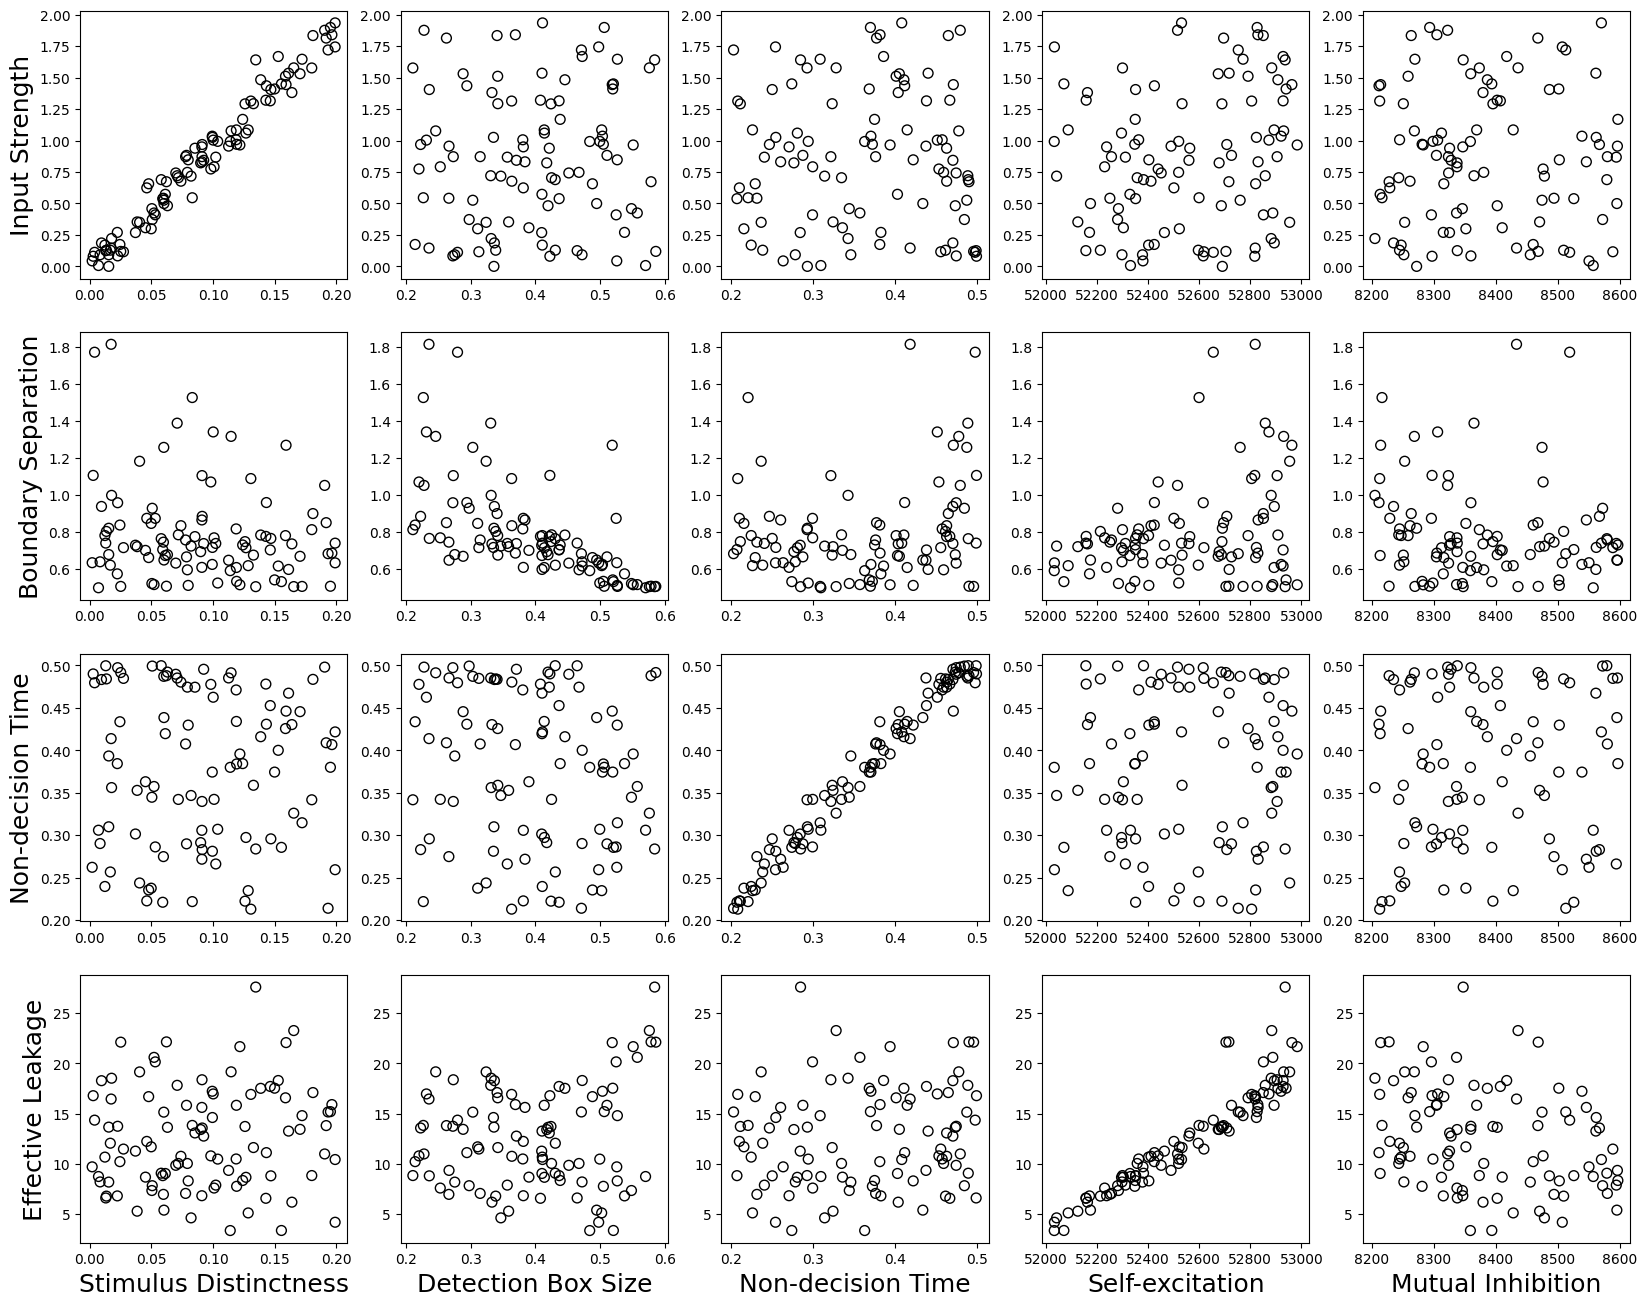

In [134]:
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time","Self-excitation", "Mutual Inhibition"]
par_fitted_labels = ["Input Strength","Boundary Separation","Non-decision Time", "Effective Leakage"]
sim_fit_plot_all(param_IDM[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 50, figsize=(20,16))

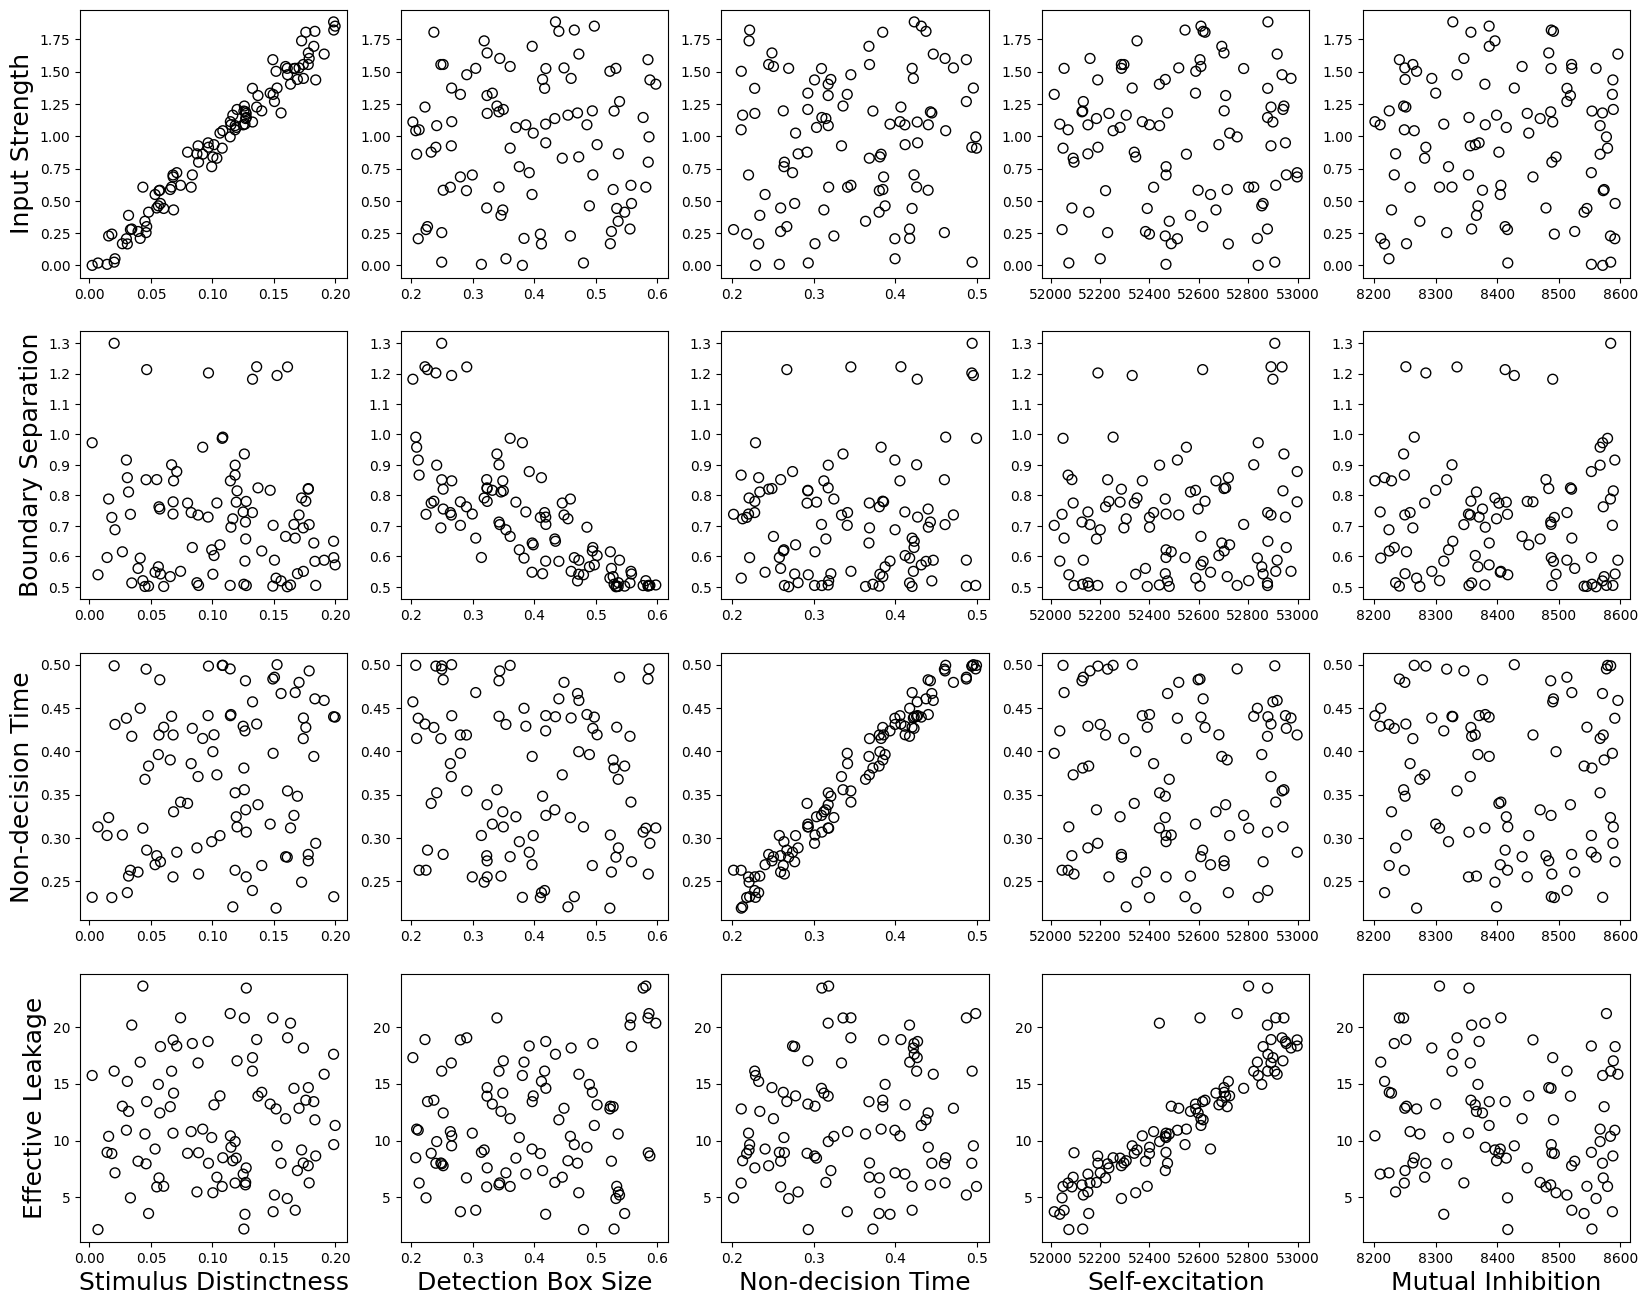

In [127]:
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time","Self-excitation", "Mutual Inhibition"]
par_fitted_labels = ["Input Strength","Boundary Separation","Non-decision Time", "Effective Leakage"]
sim_fit_plot_all(param_IDM[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 50, figsize=(20,16))

In [120]:
par_fitted_copy = par_fitted.copy()
param_IDM_copy = np.array((param_IDM)).copy()